In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/mandujoayo/인공지능개론/과제/230518/Raisin_dataset.csv", index_col = None)

In [3]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [4]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [5]:
data.isnull()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
895,False,False,False,False,False,False,False,False
896,False,False,False,False,False,False,False,False
897,False,False,False,False,False,False,False,False
898,False,False,False,False,False,False,False,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [7]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [8]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='Class', ylabel='count'>

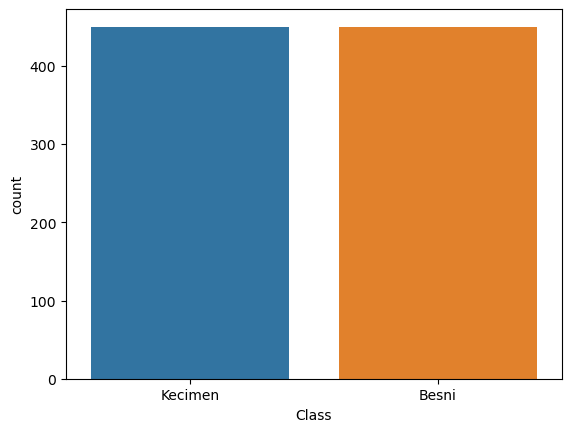

In [9]:
sns.countplot(data = data, x="Class")

In [10]:
X = data.iloc[:,0:7].values
y = data.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
encoder =  LabelEncoder()
Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [11]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, ...,
        9.05460000e+04, 7.58650579e-01, 1.18404000e+03],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, ...,
        7.87890000e+04, 6.84129570e-01, 1.12178600e+03],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, ...,
        9.37170000e+04, 6.37612812e-01, 1.20857500e+03],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, ...,
        1.06264000e+05, 7.41098519e-01, 1.29282800e+03],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, ...,
        9.76530000e+04, 6.58798253e-01, 1.25854800e+03],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, ...,
        8.91970000e+04, 6.32019963e-01, 1.27286200e+03]])

In [12]:
y

array(['Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(200,input_shape=(7,),activation='elu'))
model.add(Dense(100,activation='elu'))
model.add(Dense(80,activation='elu'))
model.add(Dense(60,activation='elu'))
model.add(Dense(30,activation='elu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1600      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 80)                8080      
                                                                 
 dense_3 (Dense)             (None, 60)                4860      
                                                                 
 dense_4 (Dense)             (None, 30)                1830      
                                                                 
 dense_5 (Dense)             (None, 2)                 62        
                                                                 
Total params: 36,532
Trainable params: 36,532
Non-traina

C:\Users\mandujoayo\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 7ms/step - loss: 2387.2085 - accuracy: 0.5056 - val_loss: 91.8830 - val_accuracy: 0.5389
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 18.5373 - accuracy: 0.5681 - val_loss: 12.1020 - val_accuracy: 0.5444
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 5.5805 - accuracy: 0.6514 - val_loss: 0.4393 - val_accuracy: 0.8389
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7722 - val_loss: 0.4202 - val_accuracy: 0.8389
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7667 - val_loss: 0.5030 - val_accuracy: 0.7611
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7667 - val_loss: 0.3972 - val_accuracy: 0.8389
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.7861 - val_loss: 0.3924 - val_accuracy: 0.8444
Epoch 8

Epoch 59/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8000 - val_loss: 0.4061 - val_accuracy: 0.8333
Epoch 60/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7486 - val_loss: 0.4555 - val_accuracy: 0.8222
Epoch 61/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7861 - val_loss: 0.3913 - val_accuracy: 0.8333
Epoch 62/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7917 - val_loss: 0.4318 - val_accuracy: 0.7889
Epoch 63/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7903 - val_loss: 0.3999 - val_accuracy: 0.8222
Epoch 64/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.7806 - val_loss: 0.3868 - val_accuracy: 0.8333
Epoch 65/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.7944 - val_loss: 0.3842 - val_accuracy: 0.8444
Epoch 

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        97
           1       0.46      1.00      0.63        83

    accuracy                           0.47       180
   macro avg       0.73      0.51      0.33       180
weighted avg       0.75      0.47      0.30       180

[[ 1 96]
 [ 0 83]]


In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'N_EPOCHS' is not defined

<Figure size 1000x700 with 0 Axes>